In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [29]:
import pandas as pd

# Let's create our Own data frame...
data = {
    'Region': ['West', 'West', 'West', 'Midwest', 'Southeast', 'Northeast', 'West', 'West', 'Northeast', 'West',
               'Southeast', 'Northeast', 'Midwest', 'Northeast', 'Northeast', 'Northeast', 'West', 'West', 'Northeast',
               'Northeast', 'West', 'Southeast', 'Northeast', 'West', 'Southeast', 'West'],
    'State': ['Idaho', 'Colorado', 'Idaho', 'Wisconsin', 'Louisiana', 'Maine', 'Wyoming', 'Connecticut', 'Louisiana',
              'Alabama', 'Ohio', 'Pennsylvania', 'Maryland', 'Georgia', 'Connecticut', 'Connecticut', 'Oregon', 'Connecticut',
              'Mississippi', 'Connecticut', 'Mississippi', 'Virginia', 'Michigan', 'Idaho', 'Louisiana', 'Montana'],
    'Item Count': [3, 5, 3, 3, 4, 4, 4, 9, 9, 3, 3, 8, 4, 6, 8, 6, 3, 10, 3, 10, 8, 4, 10, 10, 8, 8],
    'Order Total': [2.08, 6.00, 9.85, 14.78, 17.13, 19.43, 22.04, 24.75, 30.89, 32.04,
                    38.22, 42.04, 43.14, 43.14, 47.85, 57.18, 58.00, 60.37, 70.91, 98.67,
                    76.09, 77.53, 80.85, 90.84, 91.99, 96.77]
}

df_o = pd.DataFrame(data)
df_o.head()

,Region,State,Item Count,Order Total
0,West,Idaho,3,2.08
1,West,Colorado,5,6.00
2,West,Idaho,3,9.85
3,Midwest,Wisconsin,3,14.78
4,Southeast,Louisiana,4,17.13


<p> HERE we have a custom data set for the number of items orderd and the total amount for the number of orders created by me just for testing purposes.. now i need to create a model to show a relation ship between these values ... JUST for learning and testing we will use LINEAR REGRESSION model to predict the value of unseen item count using our model ... </p>

# CREATING A LINEAR REGRESSION MODEL

In [13]:
LRM = LinearRegression()
LRM

LinearRegression()

In [47]:
ind_variable = df_o[["Item Count"]]
dep_variable = df_o['Order Total']

# TRAINING THE MODEL

In [48]:
LRM.fit(ind_variable, dep_variable)

LinearRegression()

In [49]:
LRM.intercept_, LRM.coef_[0]

(10.849057071960289, 6.221182795698928)

 <p> HERE these are the intercept and slope of the regression formula i.e yhat = mx + b or yhat = b0 + b1x1 where (b=3.5178653887064995, m=0.051522058386395286) // (b0=3.5178653887064995, b1=0.051522058386395286). </p>
 
 <p>NOW Lets predict the data using our model and test it for unseen data but first we will draw a scatter plot to see the relation ship between these data we will use matplotlib to plot the regression plot.</p>

In [50]:
# predection for the previously trained data to draw a trend Line
yhat = LRM.predict(ind_variable)
yhat

array([29.51260546, 41.95497105, 29.51260546, 29.51260546, 35.73378825,
       35.73378825, 35.73378825, 66.83970223, 66.83970223, 29.51260546,
       29.51260546, 60.61851944, 35.73378825, 48.17615385, 60.61851944,
       48.17615385, 29.51260546, 73.06088503, 29.51260546, 73.06088503,
       60.61851944, 35.73378825, 73.06088503, 73.06088503, 60.61851944,
       60.61851944])

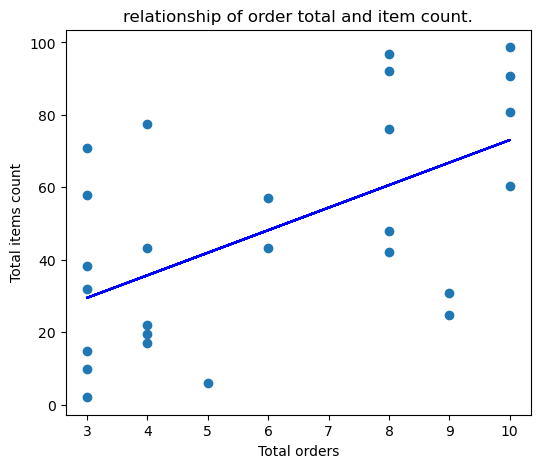

In [78]:
# Lets plot this to see the relation between these data
plt.figure(figsize=(6, 5))
plt.scatter(x=ind_variable, y=dep_variable)
plt.plot(ind_variable, yhat, color="blue")
plt.xlabel("Total orders")
plt.ylabel("Total items count")
plt.title("relationship of order total and item count.")
plt.show()

In [63]:
# if we find the correlation between them then

correlation = df_o[["Order Total", "Item Count"]].corr()
percentage = correlation.loc["Item Count", "Order Total"]
correlation


,Order Total,Item Count
Order Total,1.000000,0.566152
Item Count,0.566152,1.000000


In [65]:
print(f"here the correlation between the order total and Item count is {round(percentage * 100)}%")

# here we can see a intermediate correlation between them

here the correlation between the order total and Item count is 57%


In [77]:
# error metrices and evaluation of the model
from sklearn.metrics import mean_squared_error, r2_score

MSE = mean_squared_error(dep_variable, yhat)
rsq_test = r2_score(dep_variable, yhat)
print("here the measn squared error for the given model is :", MSE)
print("here the r_squared test/r2_score for the given model is : " + str(round(rsq_test * 100, 2)) + "% which means it only reduces approximately 32% of the error in the model." )

here the measn squared error for the given model is : 586.93610596806
here the r_squared test/r2_score for the given model is : 32.05% which means it only reduces approximately 32% of the error in the model.


In [80]:
# now for the prediction part
from time import *
item = int(input("what is the total count of the order: "))
prediction = LRM.coef_[0] * item + LRM.intercept_
print("calculating.....")
sleep(2)
print(f"If the orderd item is {item} then the total would be ${round(prediction, 2)}")

what is the total count of the order: 7
calculating.....
If the orderd item is 7 then the total would be $54.4


<p>This is a regression model under supervised Learning in Machine learning. as for practical life we can easily calculate the total amount given the number of items it only show how powerful a ML model can be.. Which can even calculate the unseen and unpredicted data and give a prediction for how much the dependent variable would be. </p>

# POWER OF MACHINE LEARNING.....